<a href="https://colab.research.google.com/github/AlineFiori/MVP/blob/main/Template_An%C3%A1lise_de_Dados_Pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Aline Fiori Gonçalves

**Matrícula:** 4052025000106

**Dataset:** [Pregnancy](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data?resource=download)

# Descrição do Problema

O conjunto de dados Pregnancy contém dados de mulheres gestantes com a finalidade de identificar caracteterísticas de saúde que possam apresentar risco à gestação. Neste dataset poderemos avaliar aspectos como: idade gestacional, pressão arterial, glicemia, frequencia cardiaca e a classificação de risco gestacional do conjunto de dados.

## Hipóteses do Problema

É comprovado cientificamente que a idade da gestacional acima dos 35 anos (35+), por sí só, aumenta o risco gestacional.

- Qual o percentual deste grupo de risco na amostra avaliada?

- Qual a classificação de risco do grupo 35+ em relação ao restantes dos dados?

- Qual a correlação entre a idade materna 35+ e o risco gestacional?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade gestacional, pressáo arterial, glicemia e frequencia cardiaca), o objetivo é prever a qual o risco gestacional.

## Atributos do Dataset

O dataset Pregnancy contém 1.014 amostras, 07 colunas, e 03 classificações diferentes de risco gestacional.

Possui cinco atributos:

- ***Age*** (idade em anos da gestante)
- ***SystolicBP*** (valor máximo da pressão arterial em mmHg, durante a gravidez)
- ***DiastolicBP*** (valor mínimo da pressão arterial em mmHg, durante a gravidez)
- ***BS (Blood Glicose)*** (níveis de glicose no sangue em termos de concentração molar, mmol/L)
- ***BodyTemp*** (temperatura corporal)
- ***HeartRate*** (frequência cardíaca normal em repouso, em batimentos por minuto)
- ***Risk Level*** (nível de intensidade de risco previsto durante a gravidez)

## Seleção de Dados

Para responder um dos questionamentos levantados na hipotese do problema, será necessario criar uma coluna no dataset Pregnancy classificando a idade gestacional em "35+".

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Pregnancy.

In [109]:
# Importar bibliotecas
import pandas as pd #manipulação e análise de dados
import numpy as np #computação numérica e científica em Python
import matplotlib.pyplot as plt #plotagem e visualização de dados
import seaborn as sns #visualização de dados científicos
from sklearn.model_selection import train_test_split #utilizado na valiação de modelos de Machine Learning, divide o dataset em treino e teste
from sklearn.preprocessing import MinMaxScaler #para escalonamento de dados (normalização)
from sklearn.preprocessing import StandardScaler #para padronizacao de dados (média de 0 e desvio padrão de 1)

In [110]:
# Link do GitHub em que o dataset 'Pregnancy' está salvo
url_github = 'https://github.com/AlineFiori/MVP/raw/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv.xls'

In [111]:
# Carregar os dados da url para um data frame pandas
Dataset = pd.read_csv(url_github)

In [112]:
# Primeiras linhas
Dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Análise de Exploratória de Dados

O objetivo desta etapa é entender a estrutura do dataset, identificar padrões, entender as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

In [113]:
# 1. Renomear colunas para facilitar o uso
colunas_para_renomear = {
    'Age': 'Idade',
    'SystolicBP': 'Pressao_Sistolica',
    'DiastolicBP': 'Pressao_Diastolica',
    'BS': 'Nivel_Glicose',
    'BodyTemp': 'Temperatura_Corporal',
    'HeartRate': 'Frequencia_Cardiaca',
    'RiskLevel': 'Nivel_Risco'}


Dataset = Dataset.rename(columns=colunas_para_renomear)

print("\nBase comcolunas renomeadas - Primeiras 5 linhas:")
print(Dataset.head())


Base comcolunas renomeadas - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  
0                  98.0                   86   high risk  
1                  98.0                   70   high risk  
2                 100.0                   80   high risk  
3                  98.0                   70   high risk  
4                  98.0                   76    low risk  


In [114]:
# 2. Visão geral: total de linhas e colunas

print(f"Total de instâncias (linhas): {len(Dataset)}")
print(f"Total de colunas: {len(Dataset.columns)}")

Total de instâncias (linhas): 1014
Total de colunas: 7


In [115]:
# 3. Análise de tipos de dados e valores nao nulos

print("\nInformações sobre os tipos de dados e valores não nulos")
Dataset.info()


Informações sobre os tipos de dados e valores não nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1014 non-null   int64  
 1   Pressao_Sistolica     1014 non-null   int64  
 2   Pressao_Diastolica    1014 non-null   int64  
 3   Nivel_Glicose         1014 non-null   float64
 4   Temperatura_Corporal  1014 non-null   float64
 5   Frequencia_Cardiaca   1014 non-null   int64  
 6   Nivel_Risco           1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [116]:
# 4. Verificação de valores ausentes

print("\nVerificação de Valores Ausentes")
print(Dataset.isnull().sum())


Verificação de Valores Ausentes
Idade                   0
Pressao_Sistolica       0
Pressao_Diastolica      0
Nivel_Glicose           0
Temperatura_Corporal    0
Frequencia_Cardiaca     0
Nivel_Risco             0
dtype: int64


In [133]:
# 5. Estatística Descritiva - Geral

print("\nEstatísticas descritivas das colunas numéricas")
print(Dataset.describe().T) # .T para transpor e facilitar a leitura, prefiro a visualização desta forma


Estatísticas descritivas das colunas numéricas
                       count        mean        std   min    25%    50%  \
Idade                 1014.0   29.871795  13.474386  10.0   19.0   26.0   
Pressao_Sistolica     1014.0  113.198225  18.403913  70.0  100.0  120.0   
Pressao_Diastolica    1014.0   76.460552  13.885796  49.0   65.0   80.0   
Nivel_Glicose         1014.0    8.725986   3.293532   6.0    6.9    7.5   
Temperatura_Corporal  1014.0   98.665089   1.371384  98.0   98.0   98.0   
Frequencia_Cardiaca   1014.0   74.301775   8.088702   7.0   70.0   76.0   

                        75%    max  
Idade                  39.0   70.0  
Pressao_Sistolica     120.0  160.0  
Pressao_Diastolica     90.0  100.0  
Nivel_Glicose           8.0   19.0  
Temperatura_Corporal   98.0  103.0  
Frequencia_Cardiaca    80.0   90.0  


In [134]:
# 6. Estatísticas descritivas agrupadas por espécie (boxplot)
Dataset.groupby('Nivel_Risco').describe()

Idade                                                      \
             count       mean        std   min   25%   50%   75%   max   
Nivel_Risco                                                              
high risk    272.0  36.216912  13.032206  12.0  25.0  35.0  48.0  65.0   
low risk     406.0  26.869458  13.121661  10.0  17.0  22.0  32.0  70.0   
mid risk     336.0  28.363095  12.552660  10.0  19.0  25.0  32.0  60.0   

            Pressao_Sistolica              ... Temperatura_Corporal         \
                        count        mean  ...                  75%    max   
Nivel_Risco                                ...                               
high risk               272.0  124.194853  ...                100.0  103.0   
low risk                406.0  105.866995  ...                 98.0  103.0   
mid risk                336.0  113.154762  ...                100.0  103.0   

            Frequencia_Cardiaca                                               \
                          count       mean       std   min   25%   50%   75%   
Nivel_Risco                                                                    
high risk                 272.0  76.742647  8.697878  60.0  70.0  77.0  86.0   
low risk                  406.0  72.770936  8.293341   7.0  70.0  70.0  77.0   
mid risk                  336.0  74.175595  6.767490  60.0  70.0  76.0  78.0   

                   
              max  
Nivel_Risco        
high risk    90.0  
low risk     88.0  
mid risk     88.0  

[3 rows x 48 columns]

count = contagem de registros do dataset

mean = média

std = desvio padrão

min = valor mínimo da categoria

25% = valor de 25% dos registros da categoria

75% = valor de 75% dos registros da categoria

max = valor máximo da categoria

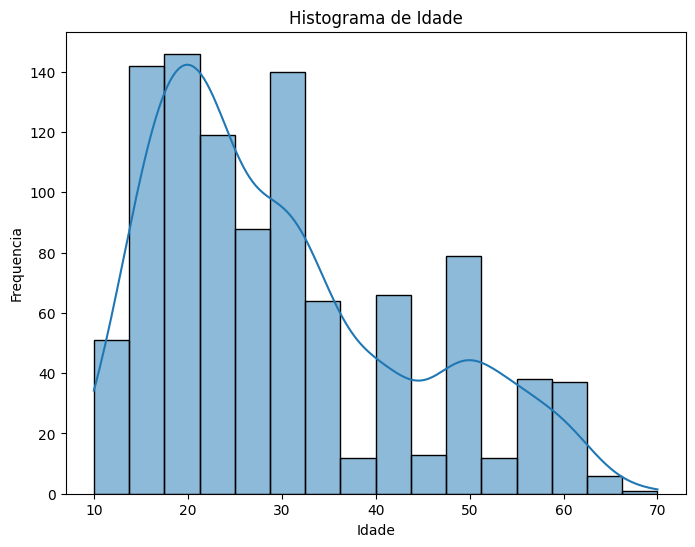

In [135]:
# 7. Análise de variáveis categóricas: analisando a frequencia de distribuição de idade no dataset


plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(Dataset['Idade'], kde=True)
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

O gráfico mostra que há mais quantidade de dados de idade gestacional <35 anos do que >= 35 anos.

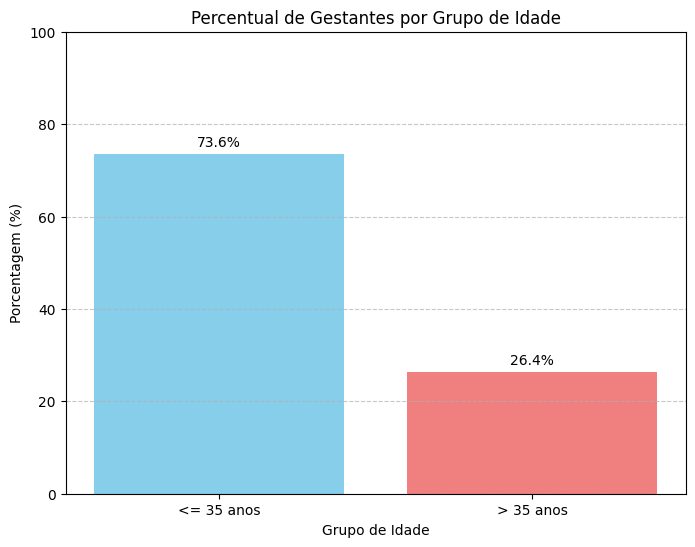

In [122]:
# 8. Análise de variáveis categóricas: analisando o % da idade <35 anos e > 35 anos

# Criar uma coluna para categorizar a idade
Dataset['Age_Group'] = Dataset['Idade'].apply(lambda x: '<= 35 anos' if x <= 35 else '> 35 anos')

# Calcular os percentuais para cada grupo de idade
age_group_percentages = Dataset['Age_Group'].value_counts(normalize=True) * 100
age_group_percentages_df = age_group_percentages.reset_index()
age_group_percentages_df.columns = ['Age_Group', 'Percentage']

# Ordenar os grupos de idade para garantir uma ordem consistente no gráfico
order = ['<= 35 anos', '> 35 anos']
age_group_percentages_df['Age_Group'] = pd.Categorical(age_group_percentages_df['Age_Group'], categories=order, ordered=True)
age_group_percentages_df = age_group_percentages_df.sort_values('Age_Group')

# Configurações para o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar as barras
bars = ax.bar(age_group_percentages_df['Age_Group'], age_group_percentages_df['Percentage'], color=['skyblue', 'lightcoral'])

# Adicionar rótulos, título
ax.set_xlabel('Grupo de Idade')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Percentual de Gestantes por Grupo de Idade')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Salvar o gráfico em um arquivo PNG
plt.savefig('percentual_idade_grupos_matplotlib.png')

# Mostrar o gráfico
plt.show()


Confirmando a análise do gráfico anterior, do total de dados da base 26,4% dos dados são de idade gestacional >= 35 anos.

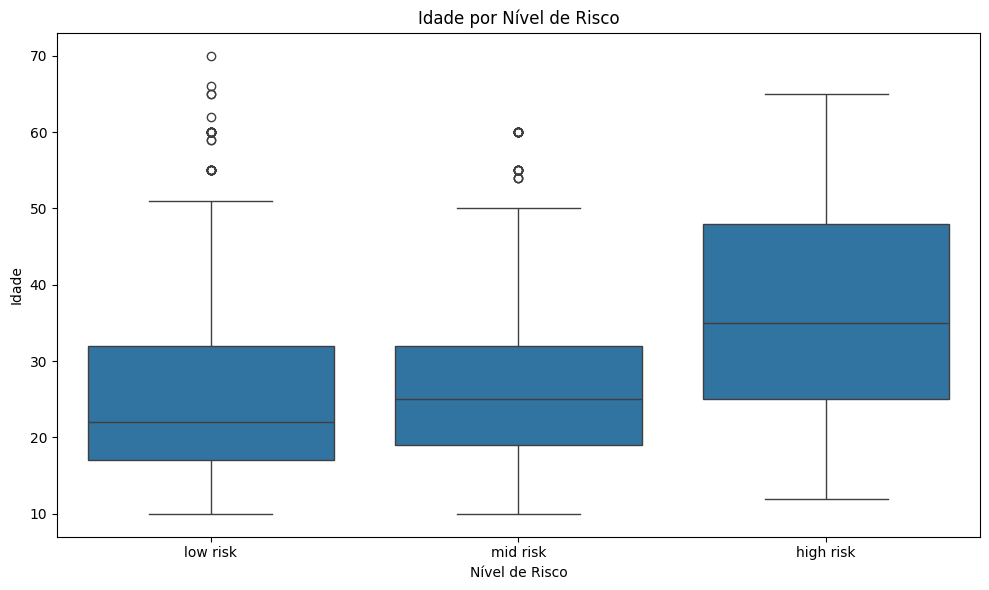

In [136]:
# 9. Análise de duas variáveis categóricas: analisando a idade em relação ao risco gestacional
# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nivel_Risco', y='Idade', data=Dataset, order=['low risk', 'mid risk', 'high risk'])

# Correcting the title and labels
plt.title('Idade por Nível de Risco')
plt.xlabel('Nível de Risco')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

Este gráfico demonstra que temos 03 categorias de risco sendo o maior risco gestacional (hight risk) concentrado em idades >= 35 anos.

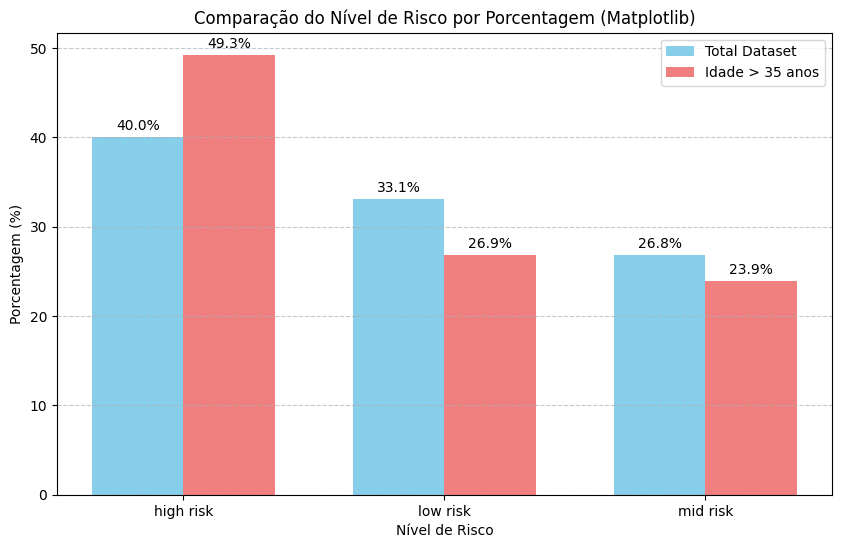

In [137]:
# 10. Análise de duas variáveis categóricas: analisando o % de nível de risco por idade
# Gráfico Barras

# 1. Calcular os percentuais para o dataset total
percent_total = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame para facilitar a manipulação
percent_total_df = percent_total.reset_index()
percent_total_df.columns = ['Nivel_Risco', 'Percentage']

# 2. Filtrar o DataFrame para idade maior que 35
df_age_gt_35 = Dataset[Dataset['Idade'] > 35]

# 3. Calcular os percentuais para o dataset filtrado (idade > 35)
percent_age_gt_35 = df_age_gt_35['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame
percent_age_gt_35_df = percent_age_gt_35.reset_index()
percent_age_gt_35_df.columns = ['Nivel_Risco', 'Percentage']

# Obter os níveis de risco únicos para os rótulos do eixo X
risk_levels = sorted(percent_total_df['Nivel_Risco'].unique())

# Configurações para o gráfico
width = 0.35 # Largura das barras
x_pos = range(len(risk_levels)) # Posições para as barras no eixo X

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para o dataset total
bars_total = ax.bar([p - width/2 for p in x_pos], percent_total_df['Percentage'], width, label='Total Dataset', color='skyblue')

# Plotar as barras para o dataset filtrado (idade > 35)
bars_age_gt_35 = ax.bar([p + width/2 for p in x_pos], percent_age_gt_35_df['Percentage'], width, label='Idade > 35 anos', color='lightcoral')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Nível de Risco')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Comparação do Nível de Risco por Porcentagem (Matplotlib)')
ax.set_xticks(x_pos)
ax.set_xticklabels(risk_levels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_total)
autolabel(bars_age_gt_35)


# Mostrar o gráfico
plt.show()


O gráfico de barras evidencia que temos 03 categorias de riscos no dataset, que a categoria de maior risco tem maior representatividade de gestantes com idade >= 35 anos.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das categorias podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [140]:
# Matriz de correlação
print("\nMatriz de Correlação:")
Dataset.iloc[:, :4].corr()


Matriz de Correlação:


,Idade,Pressao_Sistolica,Pressao_Diastolica,Nivel_Glicose
Idade,1.000000,0.416045,0.398026,0.473284
Pressao_Sistolica,0.416045,1.000000,0.787006,0.425172
Pressao_Diastolica,0.398026,0.787006,1.000000,0.423824
Nivel_Glicose,0.473284,0.425172,0.423824,1.000000


Matriz de Correlação para Idade > 35 e Risco Gestacional:
                         Idade  Nivel_Risco_Numerico
Idade                 1.000000             -0.236107
Nivel_Risco_Numerico -0.236107              1.000000


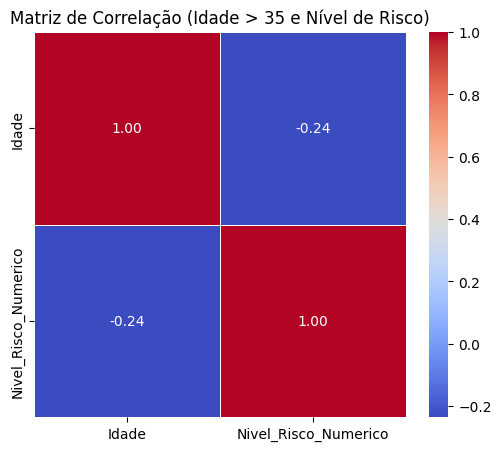

In [139]:
# 1. Filtrar o DataFrame para incluir apenas pessoas com idade maior que 35
df_idade_maior_35 = Dataset[Dataset['Idade'] > 35].copy() # .copy() para evitar SettingWithCopyWarning

# 2. Converter a coluna 'Nivel_Risco' de categórica para numérica
# Vamos mapear os níveis de risco para números, assumindo uma ordem ordinal.
# Você pode ajustar este mapeamento se a ordem for diferente ou se for nominal e não ordinal.
mapeamento_risco = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_idade_maior_35['Nivel_Risco_Numerico'] = df_idade_maior_35['Nivel_Risco'].map(mapeamento_risco)

# Verificar se há valores NaN após o mapeamento (se houver Nível_Risco não mapeado)
if df_idade_maior_35['Nivel_Risco_Numerico'].isnull().any():
    print("Atenção: Alguns valores de 'Nivel_Risco' não foram mapeados para numéricos. Verifique o mapeamento.")
    print(df_idade_maior_35[df_idade_maior_35['Nivel_Risco_Numerico'].isnull()]['Nivel_Risco'].unique())

# 3. Selecionar as colunas para a matriz de correlação
# Queremos 'Idade' e a versão numérica do 'Nivel_Risco'
colunas_para_correlacao = df_idade_maior_35[['Idade', 'Nivel_Risco_Numerico']]

# 4. Calcular a matriz de correlação
matriz_correlacao = colunas_para_correlacao.corr()

print("Matriz de Correlação para Idade > 35 e Risco Gestacional:")
print(matriz_correlacao)

# Opcional: Visualizar a matriz de correlação com um heatmap (requer seaborn)
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação (Idade > 35 e Nível de Risco)')
plt.show()

Matriz de Correlação das Primeiras 4 Colunas:
                       Idade  Pressao_Sistolica  Pressao_Diastolica  \
Idade               1.000000           0.416045            0.398026   
Pressao_Sistolica   0.416045           1.000000            0.787006   
Pressao_Diastolica  0.398026           0.787006            1.000000   
Nivel_Glicose       0.473284           0.425172            0.423824   

                    Nivel_Glicose  
Idade                    0.473284  
Pressao_Sistolica        0.425172  
Pressao_Diastolica       0.423824  
Nivel_Glicose            1.000000  


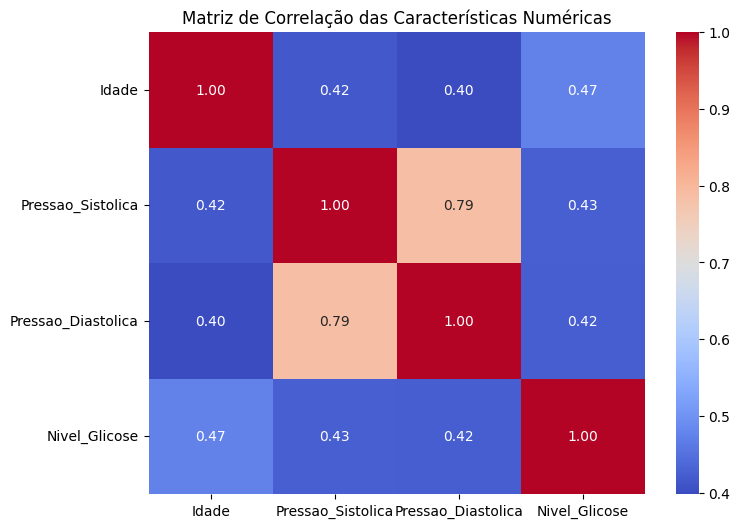

In [144]:
# 1. Calcule a matriz de correlação das primeiras 4 colunas
matriz_correlacao = Dataset.iloc[:, :4].corr()

# 2. Imprima a matriz de correlação
print("Matriz de Correlação das Primeiras 4 Colunas:")
print(matriz_correlacao)

# 3. Gerar e exibir o mapa de calor (como você já tem)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

Explicar

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, ou seja, transformar os dados brutos em um formato adequado para algoritmos de aprendizado de máquina, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Treino e Teste

In [ ]:
# Preparar o dataset para a etapa de treino e teste

# 1. Separar features (X) e target (y)
# X serão todas as colunas, exceto 'Nivel_Risco'
X = Dataset.drop('Nivel_Risco', axis=1)

# y será a coluna 'Nivel_Risco'
y = Dataset['Nivel_Risco']

In [ ]:
# 2. Dividir os dados em conjuntos de treino e teste

# - Train_test_split(...): Esta é a função que faz a divisão:
# - X, y: São os dados de entrada e a variável alvo.
# - Test_size=0.3: Define que 30% dos dados serão usados para o conjunto de teste e os 70% restantes para o conjunto de treino.
# - Random_state=42: garante que a divisão seja a mesma toda vez que você rodar o código.
    #Isso é crucial para a reprodutibilidade dos seus experimentos.
# - Stratify=y: é crucial para problemas de classificação, garantindo que as proporções de cada
    # nível de risco (neste caso, 'low risk', 'mid risk', 'high risk') sejam mantidas nos conjuntos de treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 3. Imprimir as dimensões dos conjuntos para verificar
print(f"Dimensão total do Dataset: {Dataset.shape}")
print(f"Dimensão de X (features): {X.shape}")
print(f"Dimensão de y (target): {y.shape}")
print("-" * 40)
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do target de treino (y_train): {y_train.shape}")
print(f"Dimensão do target de teste (y_test): {y_test.shape}")
print("-" * 40)
print("Distribuição do Nivel_Risco no Dataset original:")
print(y.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Dimensão total do Dataset: (1014, 7)
Dimensão de X (features): (1014, 6)
Dimensão de y (target): (1014,)
----------------------------------------
Dimensão do conjunto de treino (X_train): (709, 6)
Dimensão do conjunto de teste (X_test): (305, 6)
Dimensão do target de treino (y_train): (709,)
Dimensão do target de teste (y_test): (305,)
----------------------------------------
Distribuição do Nivel_Risco no Dataset original:
Nivel_Risco
low risk     0.400394
mid risk     0.331361
high risk    0.268245
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de treino:
Nivel_Risco
low risk     0.400564
mid risk     0.331453
high risk    0.267983
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de teste:
Nivel_Risco
low risk     0.400000
mid risk     0.331148
high risk    0.268852
Name: proportion, dtype: float64


In [ ]:
# Tratamento de valores ausentes

#Náo há valores ausentes no dataset

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
      Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0  0.150000           0.555556            0.607843       0.076923   
1  0.733333           0.777778            1.000000       0.692308   
2  0.666667           0.666667            1.000000       0.769231   
3  0.100000           0.222222            0.313725       0.069231   
4  0.750000           0.555556            0.803922       0.061538   

   Temperatura_Corporal  Frequencia_Cardiaca  
0                   0.0             0.759036  
1                   0.0             0.710843  
2                   0.0             0.819277  
3                   0.0             0.831325  
4                   0.0             0.710843  


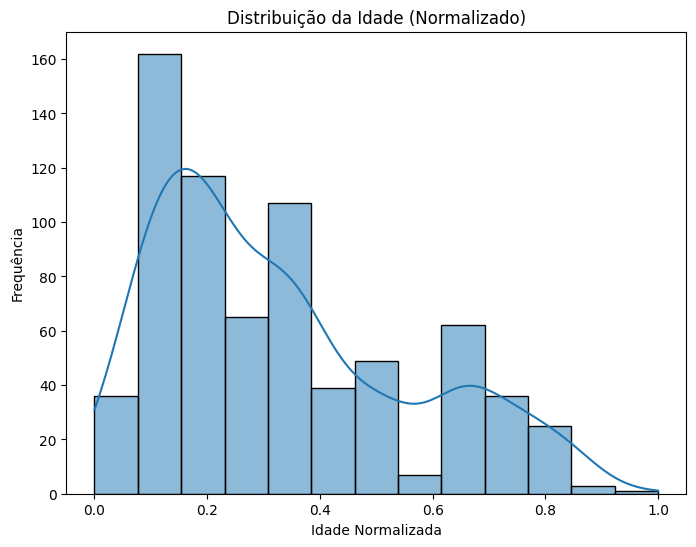

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Idade'], kde=True)
plt.title('Distribuição da Idade (Normalizado)')
plt.xlabel('Idade Normalizada')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.




explicarrrrrrr

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. explicar maissssssss

In [ ]:
# Identificar as colunas numéricas para padronização
# Excluímos 'RiskLevel' porque é categórica (já tratada com codificação, como One-Hot)
numerical_cols = ['Idade', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca']


# 3. Inicializar o StandardScaler
scaler = StandardScaler()

# 4. Ajustar (fit) o scaler APENAS nos dados de treino e transformar (transform)
# Criar cópias para evitar SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# 5. Transformar os dados de teste usando o scaler já ajustado nos dados de treino
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train_scaled (Após Padronização nos dados de Treino):")
print(X_train_scaled.head())
print("\nVerificando médias e desvios padrão de X_train_scaled para as colunas numéricas:")
print(X_train_scaled[numerical_cols].agg(['mean', 'std']).round(2)) # Arredondar para melhor visualização

print("\nX_test_scaled (Após Padronização usando os parâmetros do Treino):")
print(X_test_scaled.head())
print("\nVerificando médias e desvios padrão de X_test_scaled para as colunas numéricas:")
print(X_test_scaled[numerical_cols].agg(['mean', 'std']).round(2))

X_train_scaled (Após Padronização nos dados de Treino):
        Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
836 -0.806934           0.362239            0.254674      -0.526083   
133  1.789549           1.432132            1.696301       1.892240   
833  1.492808           0.897186            1.696301       2.194530   
80  -1.029490          -1.242599           -0.826546      -0.556312   
100  1.863734           0.362239            0.975487      -0.586541   

     Temperatura_Corporal  Frequencia_Cardiaca  
836              -0.49954            -0.542547  
133              -0.49954            -1.019061  
833              -0.49954             0.053095  
80               -0.49954             0.172224  
100              -0.49954            -1.019061  

Verificando médias e desvios padrão de X_train_scaled para as colunas numéricas:
      Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
mean   -0.0               -0.0                 0.0            0.0   
std

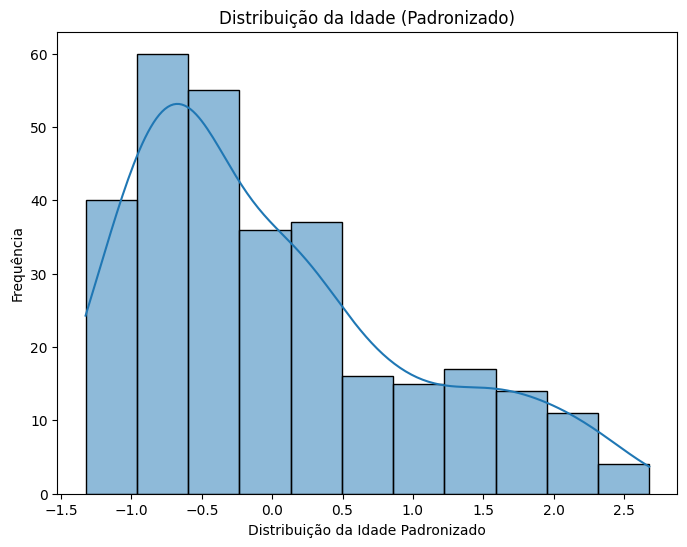

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(X_test_scaled['Idade'], kde=True)
plt.title('Distribuição da Idade (Padronizado)')
plt.xlabel('Distribuição da Idade Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.



Explicarrrrrrrrrr

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
Dataset.isnull().sum()

Valores nulos no dataset Iris:


,0
Idade,0
Pressao_Sistolica,0
Pressao_Diastolica,0
Nivel_Glicose,0
Temperatura_Corporal,0
Frequencia_Cardiaca,0
Nivel_Risco,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão
resultado da matriz de correlacao
Análise por Pares de Variáveis
1. Idade e Outras Variáveis

Idade vs. Pressão Sistólica (0.416045): Há uma correlação positiva moderada. Isso sugere que, à medida que a idade aumenta, a pressão sistólica tende a aumentar.
Idade vs. Pressão Diastólica (0.398026): Similar à sistólica, há uma correlação positiva moderada. Conforme a idade avança, a pressão diastólica também tende a aumentar.
Idade vs. Nível de Glicose (0.473284): Esta é a correlação positiva mais forte da Idade com as outras variáveis. Indica que, com o aumento da idade, há uma tendência de o nível de glicose também ser mais alto.
2. Pressão Sistólica e Outras Variáveis

Pressão Sistólica vs. Pressão Diastólica (0.787006): Esta é uma correlação positiva forte. É a relação mais forte na matriz, o que faz sentido clinicamente, pois as duas medidas de pressão arterial estão intrinsecamente ligadas e tendem a se mover na mesma direção de forma acentuada.
Pressão Sistólica vs. Nível de Glicose (0.425172): Há uma correlação positiva moderada. Pessoas com pressão sistólica mais alta tendem a ter um nível de glicose mais elevado, embora a relação não seja tão forte quanto entre as próprias pressões.
3. Pressão Diastólica e Nível de Glicose

Pressão Diastólica vs. Nível de Glicose (0.423824): Também uma correlação positiva moderada. Semelhante à sistólica, um aumento na pressão diastólica está associado a uma tendência de elevação do nível de glicose.
Resumo e Implicações
Relação Mais Forte: A relação mais forte é entre Pressão Sistólica e Pressão Diastólica (0.787), o que é esperado.
Impacto da Idade: A idade tem uma correlação positiva moderada com todas as outras variáveis de saúde, sendo um pouco mais forte com o Nível de Glicose. Isso sugere que, com o envelhecimento, há uma tendência a ter valores mais elevados de pressão arterial (sistólica e diastólica) e glicose.
Interconexão: Todas as variáveis de saúde (Pressão Sistólica, Pressão Diastólica e Nível de Glicose) mostram correlações positivas moderadas entre si, indicando que elas tendem a se mover juntas em certa medida. Isso é consistente com o entendimento de que esses indicadores de saúde frequentemente estão interligados.
É importante lembrar que correlação não implica causalidade. Esta matriz mostra apenas a força e a direção da relação linear entre essas variáveis. Para entender se uma variável causa a outra, seriam necessárias análises mais aprofundadas, como estudos longitudinais ou experimentos controlados. No entanto, esses resultados podem ser um excelente ponto de partida para identificar quais relações valem a pena investigar com mais detalhes.







resultado do grafico de correlacao idade risco
Com base nesses resultados:

Existe uma correlação negativa fraca entre a Idade e o Nível de Risco Numérico.
Isso implica que, à medida que a idade aumenta, o nível de risco numérico tende a diminuir, mas de forma muito sutil. A relação não é forte, o que significa que a idade sozinha não é um fator determinante muito influente no nível de risco.
Outros fatores provavelmente têm um impacto muito maior no nível de risco, já que a idade explica apenas uma pequena parte da variação observada.
É importante lembrar que correlação não implica causalidade. Embora haja uma tendência, não podemos afirmar que a idade causa a diminuição do nível de risco com base apenas nesse resultado. Podem haver outras variáveis ou fatores em jogo.





Responder:
- É comprovado cientificamente que a idade da gestante, por sí só, aumenta o risco gestacional. Qual o precentual deste grupo de risco na amostra avaliada e como está classificado em relação ao risco?

- Qual a correlação entre a idade materna e o risco gestacional?

- Dos aspectos de saúde apresentados neste trabalho, qual tem maior influência no risco gestacional?





A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.